# Load Libraries

In [97]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling

# Import Cleaned Data from Task 1

In [98]:
df=pd.read_csv('credit_clean.csv', header=0)
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


# Run Pandas Profiling
Result included in git repository as HTML

In [99]:
#profile=pandas_profiling.ProfileReport(df)
#profile.to_file("credit_profile.html")

# Get Exact Correlations
(if desired)

In [100]:
#df.corr()

# Define Bins/Reduce or Improve Variables
* Added Variable
 * At one point I thought a ratio of a customers bill to payment would be helpful (still might be), which is the inception of the percent_paid variable
* Bins
 * Limit_bal, age and precent_paid
* Removed Variables
 * BILL_AMT, PAY, and PAY_AMT were reduced to a single variable each


In [227]:
dfbill=df.loc[:,'BILL_AMT1':'BILL_AMT6']
dfpay=df.loc[:,'PAY_AMT1':'PAY_AMT6']
df['BILL_AVG']=dfbill.mean(axis=1)
df['PAY_AVG']=dfpay.mean(axis=1)
df['PERCENT_PAID']= df['PAY_AVG']/df['BILL_AVG']*100
df['LIMIT_BAL_BIN']=pd.cut(x = df['LIMIT_BAL'],
                        bins = [0, 100000,200000,300000,400000,500000,600000,700000,800000], 
                        labels=False,
                        precision=0)
df['AGE_BIN']=pd.cut(x = df['AGE'],
                        bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], 
                        labels=False,
                        precision=0)
#dfr=df.drop(columns=['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])
dfr=df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','BILL_AVG','PAY_AVG','DEFAULT','PERCENT_PAID','AGE_BIN','LIMIT_BAL_BIN']]
dfr.dropna()
dfr=dfr[(dfr['PERCENT_PAID']>=0) & (dfr['PERCENT_PAID']<=100)]

dfr['PERCENT_PAID_BIN']=pd.cut(x = df['PERCENT_PAID'],
                        bins = [0, 25,50, 75,100], 
                        labels=False,
                        precision=0)


# Sanity Check

In [228]:
dfr.dropna()
dfr.describe()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,BILL_AVG,PAY_AVG,DEFAULT,PERCENT_PAID,AGE_BIN,LIMIT_BAL_BIN,PERCENT_PAID_BIN
count,26077.000000,26077.000000,26077.000000,26077.000000,26077.000000,26077.000000,26077.000000,26077.000000,26077.000000,26076.000000,25440.000000
mean,158518.989148,1.559880,35.284925,0.080876,51047.882694,5088.840255,0.224911,24.583924,2.976148,1.044294,0.648664
std,127752.137602,0.522604,9.243740,1.072041,65573.576737,8555.327981,0.417532,30.416834,0.958831,1.228018,1.074923
min,10000.000000,0.000000,21.000000,-2.000000,-6467.833333,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,0.000000,8901.833333,1200.000000,0.000000,4.098438,2.000000,0.000000,0.000000
50%,130000.000000,2.000000,34.000000,0.000000,27574.166667,2433.833333,0.000000,7.295227,3.000000,1.000000,0.000000
75%,230000.000000,2.000000,41.000000,0.000000,66784.833333,5482.500000,0.000000,36.500545,4.000000,2.000000,1.000000
max,1000000.000000,3.000000,79.000000,8.000000,877313.833333,235888.833333,1.000000,100.000000,7.000000,7.000000,3.000000


# Grouped Boxplots

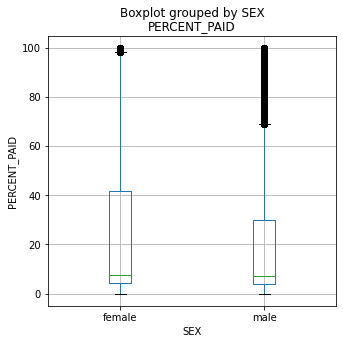

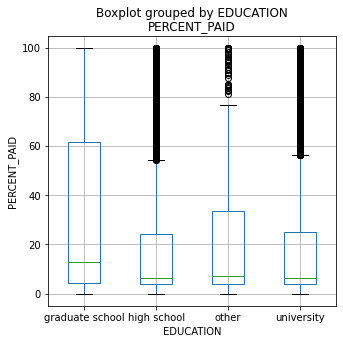

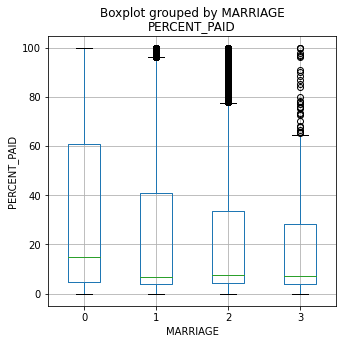

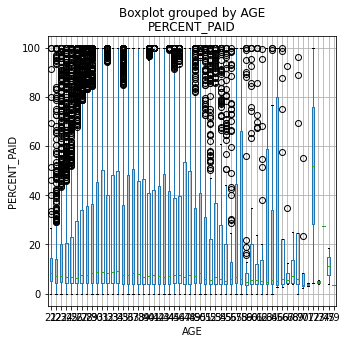

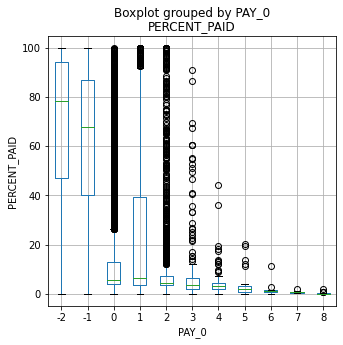

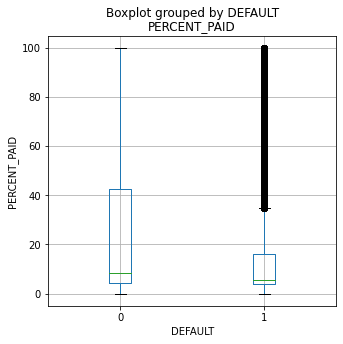

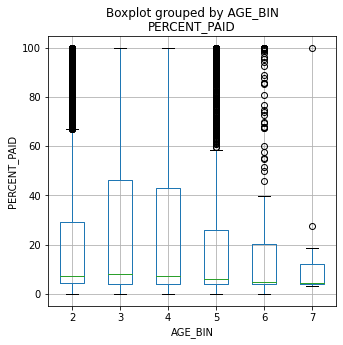

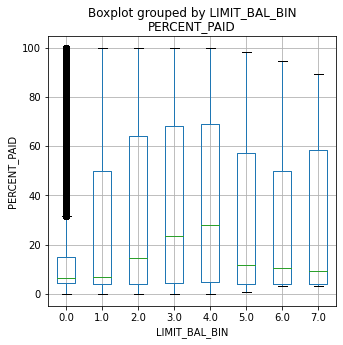

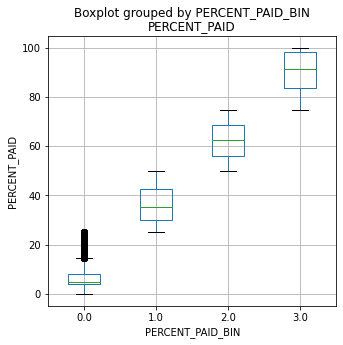

In [229]:
dep_var='PERCENT_PAID'
for col in dfr.columns:
    if col!=dep_var and col not in ['PAY_AVG','BILL_AVG','LIMIT_BAL']:
        dfr2=dfr[[col,dep_var]]
        ax=dfr2.boxplot(by=col,figsize=(5,5))
        ax.set_xlabel(col)
        ax.set_ylabel(dep_var)

# Recode Catagoric Variables to Match Data Dictionary

In [230]:
dfr['SEX']=dfr['SEX'].replace({'male':1,'female':2})
dfr['EDUCATION']=dfr['EDUCATION'].replace({'university':2, 'graduate school':1, 'high school':3, 'other':4})
dfr['DEFAULT']=dfr['DEFAULT'].replace({'default':1, 'not default':0})
dfr=dfr.convert_dtypes()
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26077 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         26077 non-null  Int64  
 1   SEX               26077 non-null  Int64  
 2   EDUCATION         26077 non-null  Int64  
 3   MARRIAGE          26077 non-null  Int64  
 4   AGE               26077 non-null  Int64  
 5   PAY_0             26077 non-null  Int64  
 6   BILL_AVG          26077 non-null  Float64
 7   PAY_AVG           26077 non-null  Float64
 8   DEFAULT           26077 non-null  Int64  
 9   PERCENT_PAID      26077 non-null  Float64
 10  AGE_BIN           26077 non-null  Int64  
 11  LIMIT_BAL_BIN     26076 non-null  Int64  
 12  PERCENT_PAID_BIN  25440 non-null  Int64  
dtypes: Float64(3), Int64(10)
memory usage: 3.1 MB


# Scatter Matrix

In [231]:
dfr_samp=dfr.sample(frac=0.25, replace=True, random_state=1)

array([[<AxesSubplot:xlabel='LIMIT_BAL', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_0', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AVG', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_AVG', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='DEFAULT', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PERCENT_PAID', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='LIMIT_BAL_BIN', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PERCENT_PAID_BIN', ylabel='LIMIT_BAL'>],
       [<AxesSubplot:xlabel='LIMIT_BAL', ylabel='SEX'>,
        <AxesSubplot:xlabel='SEX', ylabel='SEX'>,
        <AxesSubplot:xlabel='EDUCATION', ylabel='SEX'>,
        <AxesSubplot:xlabel='MARRIAGE', ylabel='SEX'>,
        <AxesSubplot:xlabel='AGE', ylabel='SEX

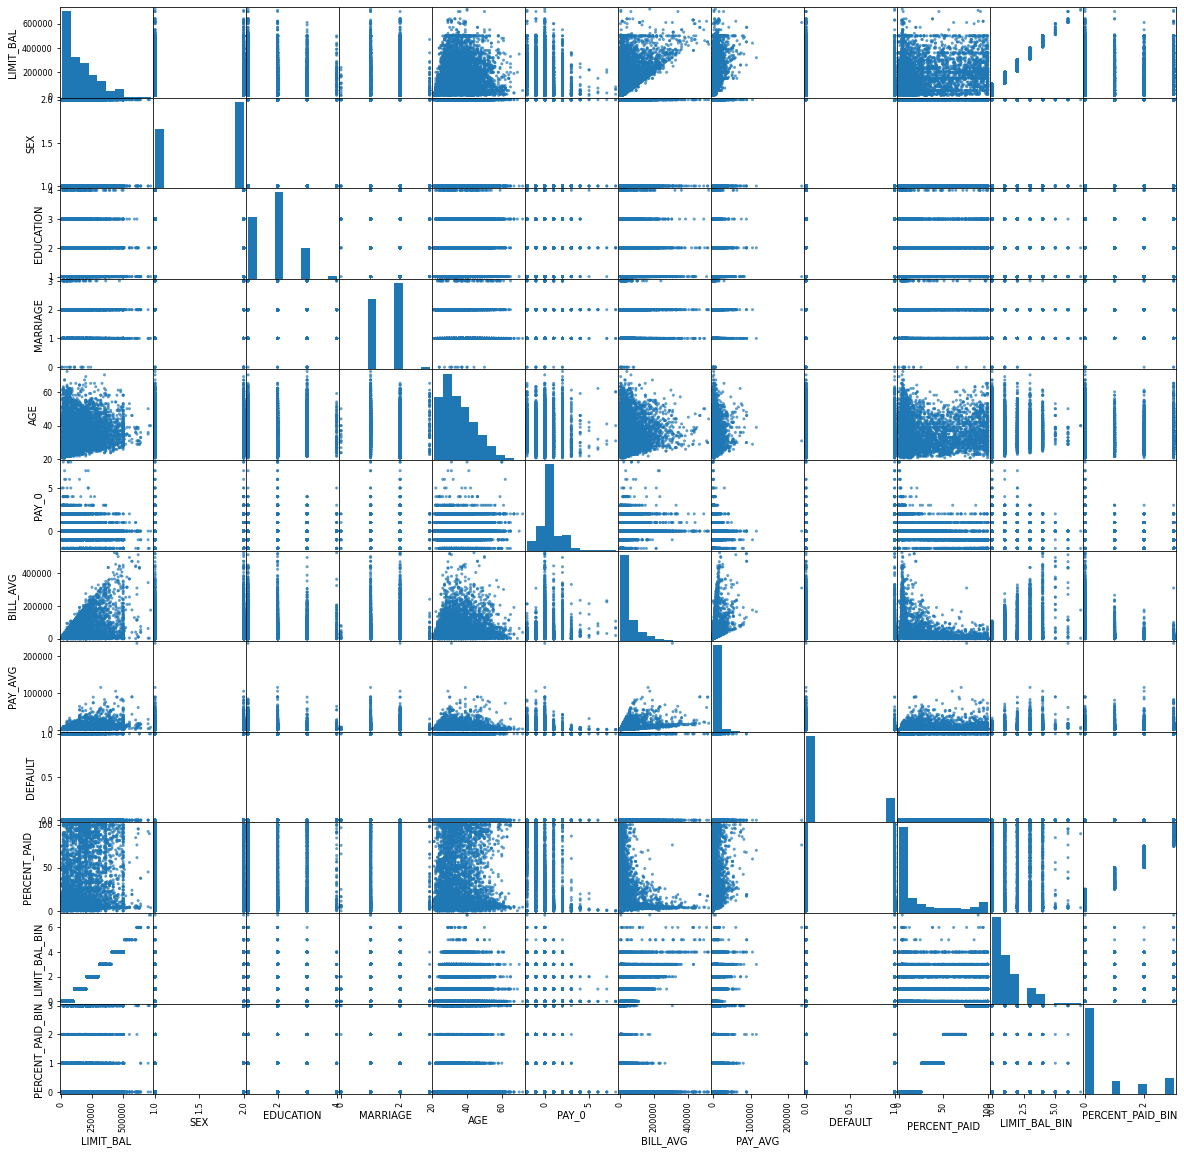

In [194]:

pd.plotting.scatter_matrix(dfr_samp,alpha=0.7,figsize=(20,20))

# Jittered Scatter Plots for Better Insight on Discrete Features

LIMIT_BAL by MARRIAGE


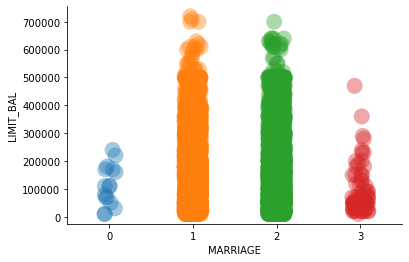

DEFAULT by MARRIAGE


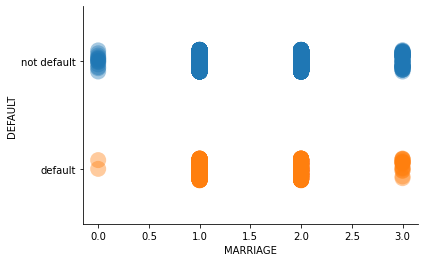

LIMIT_BAL_BIN by MARRIAGE


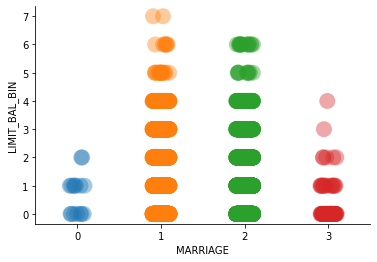

PERCENT_PAID_BIN by MARRIAGE


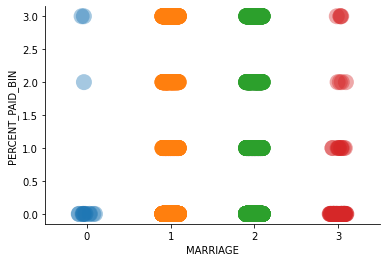

LIMIT_BAL by PAY_0


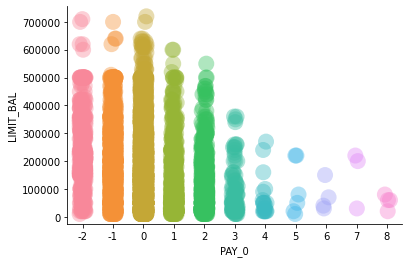

DEFAULT by PAY_0


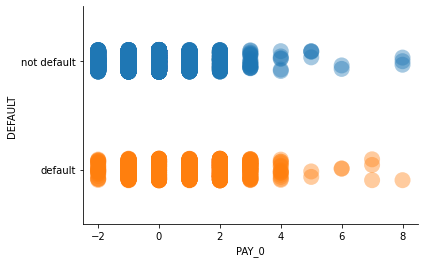

LIMIT_BAL_BIN by PAY_0


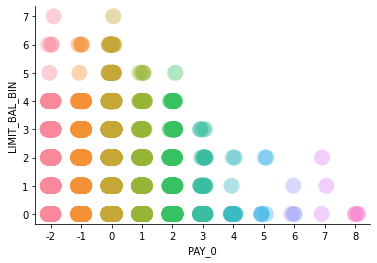

PERCENT_PAID_BIN by PAY_0


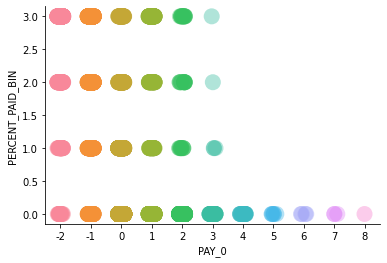

LIMIT_BAL by EDUCATION


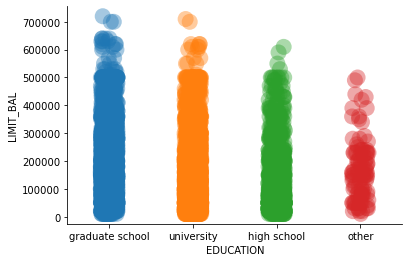

DEFAULT by EDUCATION


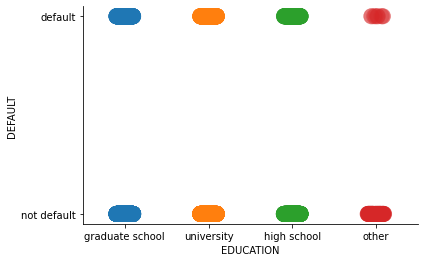

LIMIT_BAL_BIN by EDUCATION


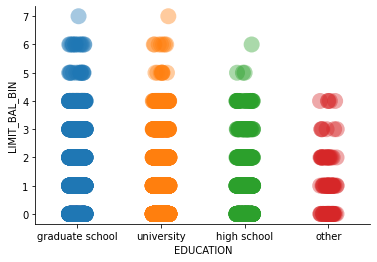

PERCENT_PAID_BIN by EDUCATION


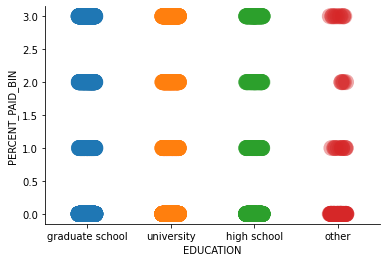

LIMIT_BAL by SEX


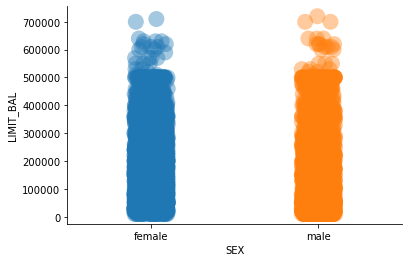

DEFAULT by SEX


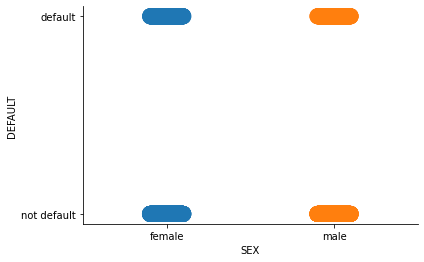

LIMIT_BAL_BIN by SEX


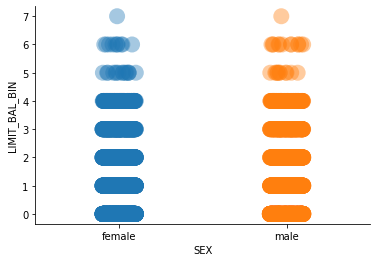

PERCENT_PAID_BIN by SEX


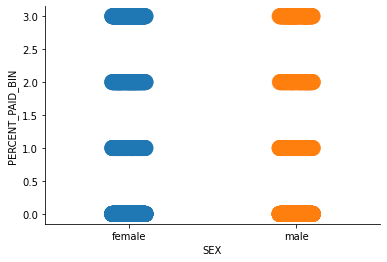

LIMIT_BAL by DEFAULT


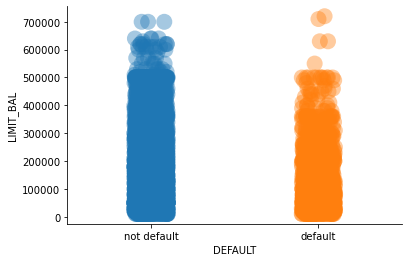

LIMIT_BAL_BIN by DEFAULT


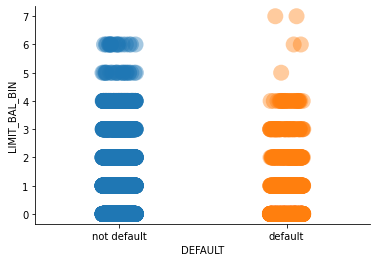

PERCENT_PAID_BIN by DEFAULT


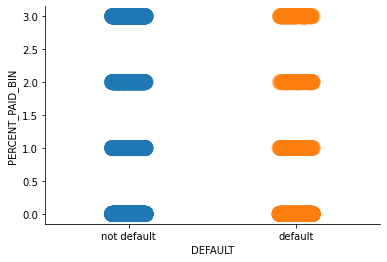

In [201]:
for xvar in ['MARRIAGE','PAY_0', 'EDUCATION','SEX','DEFAULT']:
    for yvar in ['LIMIT_BAL','DEFAULT','LIMIT_BAL_BIN','PERCENT_PAID_BIN']:#dfr_samp.columns:
        if xvar!=yvar:
            print(yvar+' by '+xvar)
            sns.stripplot(x=xvar, y=yvar, data=dfr_samp, jitter=True, edgecolor='none', alpha=.40,size=16)
            sns.despine()
            plt.show()

LIMIT_BAL_BIN by DEFAULT


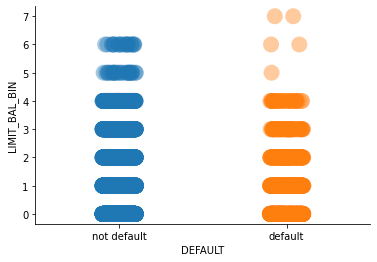

PERCENT_PAID_BIN by DEFAULT


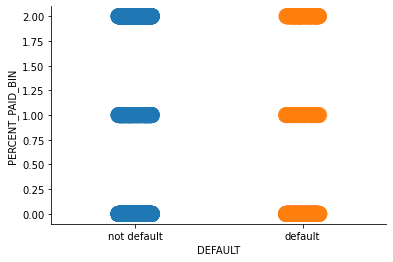

DEFAULT by LIMIT_BAL_BIN


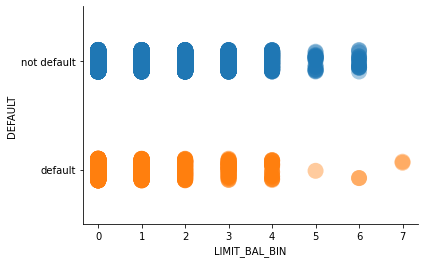

PERCENT_PAID_BIN by LIMIT_BAL_BIN


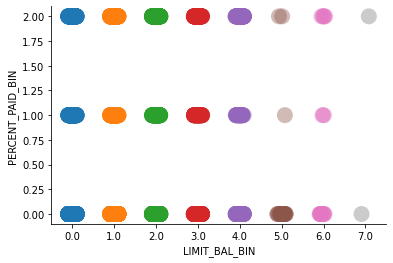

DEFAULT by PERCENT_PAID_BIN


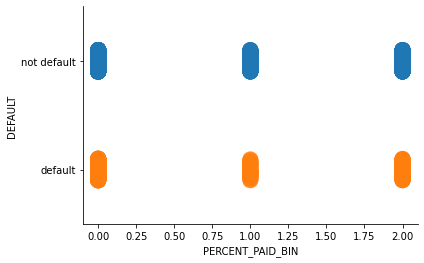

LIMIT_BAL_BIN by PERCENT_PAID_BIN


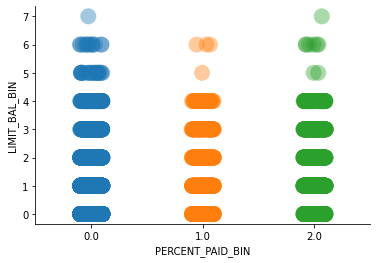

In [189]:
for xvar in ['DEFAULT','LIMIT_BAL_BIN','PERCENT_PAID_BIN']:
    for yvar in ['DEFAULT','LIMIT_BAL_BIN','PERCENT_PAID_BIN']:#dfr_samp.columns:
        if xvar!=yvar:
            print(yvar+' by '+xvar)
            sns.stripplot(x=xvar, y=yvar, data=dfr_samp, jitter=True, edgecolor='none', alpha=.40,size=16)
            sns.despine()
            plt.show()

# Define Default Percentage Per Demographic and Graph

DEFAULT_PCT by SEX


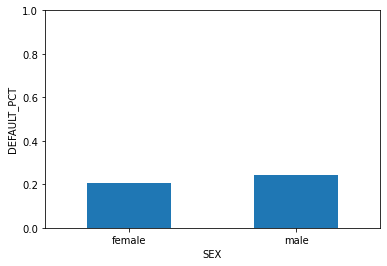

DEFAULT_PCT by EDUCATION


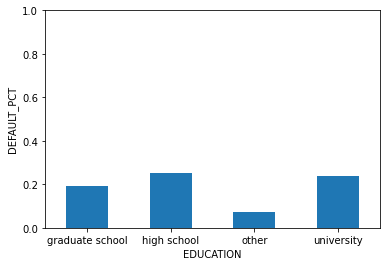

DEFAULT_PCT by MARRIAGE


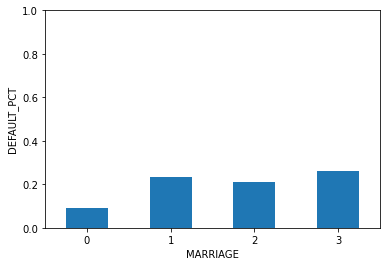

DEFAULT_PCT by AGE_BIN


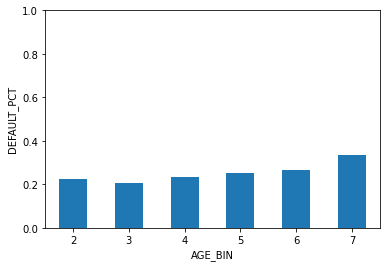

DEFAULT_PCT by PAY_0


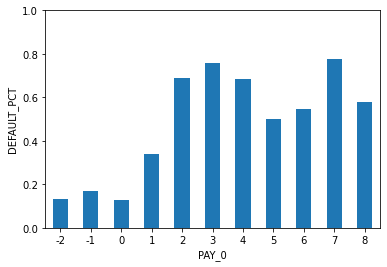

DEFAULT_PCT by PERCENT_PAID_BIN


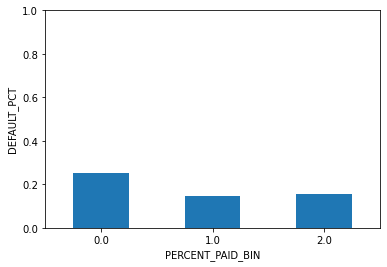

DEFAULT_PCT by LIMIT_BAL_BIN


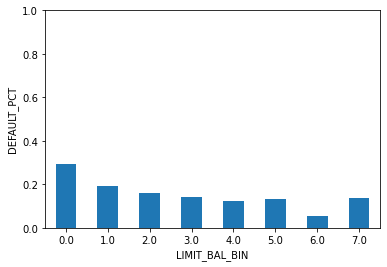

In [233]:
df['DEFAULT']=df['DEFAULT'].replace({'default':1, 'not default':0})
for xvar in ['SEX','EDUCATION','MARRIAGE','AGE_BIN','PAY_0','PERCENT_PAID_BIN','LIMIT_BAL_BIN']:
    df_dp=df
    df_dp=df[[xvar,'DEFAULT']]
    df_dp=df_dp.groupby([xvar]).agg({'DEFAULT': ['sum','count']})
    df_dp.columns = ['DEFAULT_SUM','DEFAULT_CT']
    df_dp=df_dp.reset_index()
    df_dp['DEFAULT_PCT']=df_dp['DEFAULT_SUM']/df_dp['DEFAULT_CT']
    print('DEFAULT_PCT by '+xvar)
    ax=df_dp.plot.bar(x=xvar,y='DEFAULT_PCT',rot=0,ylim=(0,1),legend=False)
    ax.set_xlabel(xvar)
    ax.set_ylabel('DEFAULT_PCT')
    plt.show()


# Scratch

In [238]:
#df_dp=df[['SEX','EDUCATION','MARRIAGE','AGE_BIN','PAY_0','PERCENT_PAID_BIN','LIMIT_BAL_BIN','DEFAULT']]
#df_dp=df_dp.groupby(['SEX','EDUCATION','MARRIAGE','AGE_BIN','PAY_0','PERCENT_PAID_BIN','LIMIT_BAL_BIN']).agg({'DEFAULT': ['sum','count']})
#df_dp.columns = ['DEFAULT_SUM','DEFAULT_CT']
#df_dp=df_dp.reset_index()
#df_dp.head()
#dep_var='DEFAULT_PCT'
#for col in df_dp.columns:
#    if col!=dep_var:
#        df_dp2=df_dp[[col,dep_var]]
#        ax=df_dp2.boxplot(by=col,figsize=(5,5))
#        ax.set_xlabel(col)
#        ax.set_ylabel(dep_var)

In [ ]:
#df=pd.get_dummies(df)
#df.head()
#df=df.drop(columns=["DEFAULT_not default"])
#df=df.rename(columns={"DEFAULT_default": "DEFAULT",'EDUCATION_graduate school':'EDUCATION_graduate_school', 'EDUCATION_high school': 'EDUCATION_high school'})
